In [1]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [2]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale =1./255)

train_dir = 'cats_and_dogs_filtered/train'
valid_dir = 'cats_and_dogs_filtered/validation'

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(valid_dir, 1000)
# test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━

In [6]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

c:\Users\Juanlu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.5934 - loss: 0.7133 - val_accuracy: 0.8140 - val_loss: 0.4664
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7540 - loss: 0.5019 - val_accuracy: 0.8480 - val_loss: 0.3872
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8324 - loss: 0.3967 - val_accuracy: 0.8560 - val_loss: 0.3528
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8451 - loss: 0.3544 - val_accuracy: 0.8660 - val_loss: 0.3272
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8714 - loss: 0.3212 - val_accuracy: 0.8710 - val_loss: 0.3153
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8879 - loss: 0.2912 - val_accuracy: 0.8810 - val_loss: 0.2970
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8995 - loss: 0.2738 - val_accuracy: 0.8670 - val_loss: 0.3013
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9126 - loss: 0.2437 - val_accuracy: 0.8830 - v

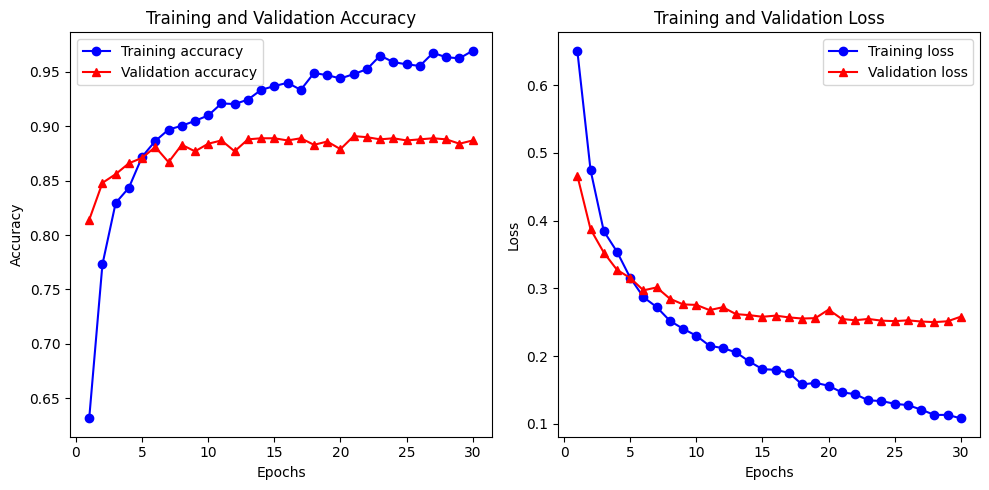

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop  # Corrección aquí

# Crear el modelo
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=RMSprop(learning_rate=2e-5),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_features,
    train_labels,
    epochs=30,
    batch_size=32,
    validation_data=(validation_features, validation_labels)
)

# Visualizar resultados
acc = history.history['accuracy']  # Cambiado de 'acc' a 'accuracy'
val_acc = history.history['val_accuracy']  # Cambiado de 'val_acc' a 'val_accuracy'
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Gráfica de precisión
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Fine-tuning

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam 

In [12]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory('cats_and_dogs_filtered/train')
valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory('cats_and_dogs_filtered/validation')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# Cargamos un modelo pre-entrenado con Imagenet
vgg_model = VGG19(include_top=False, weights="imagenet", input_shape=(256, 256, 3))

# Congelamos al modelo / que los parámetros no se actualicen
for layer in vgg_model.layers[:12]:
    layer.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [14]:
model = Sequential()

model.add(vgg_model)

model.add(Flatten())
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=2,   activation="softmax"))

In [17]:
# Configuración
model.compile(optimizer=Adam(learning_rate=1e-5),
             loss="categorical_crossentropy",
             metrics=["acc"])

# Entrenamos al modelo
history = model.fit(train_gen, validation_data=valid_gen, epochs=10)

c:\Users\Juanlu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2643s 42s/step - acc: 0.7218 - loss: 3.4698 - val_acc: 0.9240 - val_loss: 0.2947
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2590s 41s/step - acc: 0.9920 - loss: 0.0254 - val_acc: 0.9390 - val_loss: 0.2370
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2597s 41s/step - acc: 1.0000 - loss: 0.0014 - val_acc: 0.9420 - val_loss: 0.2289
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2598s 41s/step - acc: 1.0000 - loss: 7.5411e-04 - val_acc: 0.9420 - val_loss: 0.2281
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2602s 41s/step - acc: 1.0000 - loss: 4.9202e-04 - val_acc: 0.9420 - val_loss: 0.2270
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2608s 42s/step - acc: 1.0000 - loss: 4.1187e-04 - val_acc: 0.9430 - val_loss: 0.2257
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2606s 41s/step - acc: 1.0000 - loss: 3.2842e-04 - val_acc: 0.9440 - val_loss: 0.2249
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2599s 41s/step - acc: 1.0000 - loss: 2.7793e-04 - val_acc: 0.9450 - val_loss: 0.2242
Epoch 9/10
63/63 ━━━━━━━━━━━

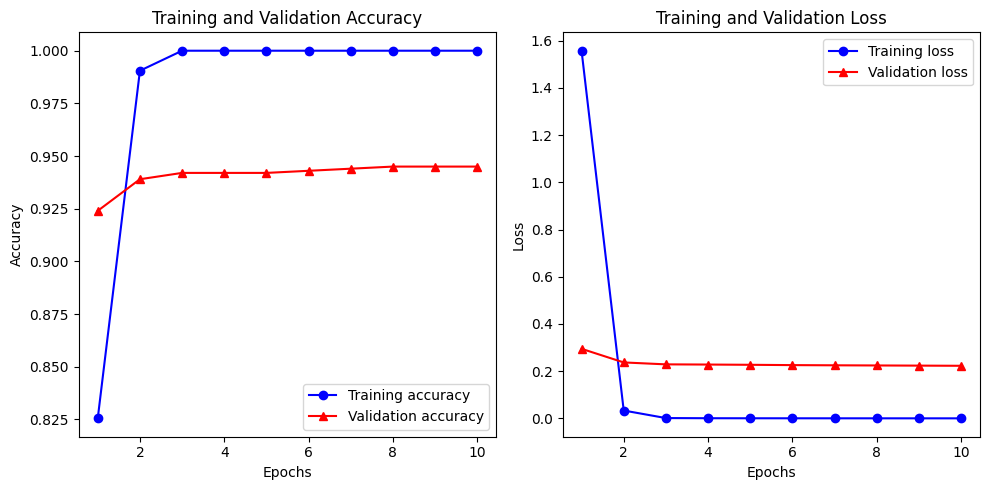

In [20]:
# Visualizar resultados
acc = history.history['acc']  # Cambiado de 'acc' a 'accuracy'
val_acc = history.history['val_acc']  # Cambiado de 'val_acc' a 'val_accuracy'
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Gráfica de precisión
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r^-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show() 